In [80]:
from rbbm_src.labelling_func_src.postprocessing.utils import show_results, show_stats

In [81]:
import glob
import pandas as pd

In [82]:
from collections import defaultdict

In [83]:
result_dict = defaultdict(list)

In [84]:
list(result_dict)

[]

In [85]:
for f in glob.glob('al_witan_results/*'):
    d_name = f.split('/')[-1]
    print(d_name)
    for ff in glob.glob(f'al_witan_results/{d_name}/*'):
        try:
            df_cur = show_stats(ff+'/')
            result_dict[d_name].append(df_cur)
        except:
            print(f"ff was not finished ")
            continue


imdb
al_witan_results/imdb/_20240516104226/20240516104226_experiment_stats
  user_input_strat             strat  seed  pickle_file_name table_name   
0  active_learning  information_gain  1903  placeholder_name       imdb  \

    timestamp_str deletion_type  deletion_absolute_threshold  rbbm_runtime   
0  20240516104226         ratio                           10        10.528  \

   bbox_runtime  ...  deletion_factor  post_fix_num_funcs   
0         49.11  ...              0.0                   7  \

   num_of_funcs_processed_by_algo  complaint_reached_max  confirm_reached_max   
0                               7                  False                False  \

   lf_source  retrain_after_percent  retrain_accuracy_thresh   
0  undefined                      1                        1  \

   load_funcs_from_pickle  pre_deletion_threshold  
0                   False                     0.0  

[1 rows x 32 columns]
al_witan_results/imdb/_20240516111728/20240516111728_experiment_stats
  use

In [86]:
res_df = []

In [87]:
for k, v in result_dict.items():
    res_df.append(pd.concat(v))

In [88]:
for k, v in result_dict.items():
    print(f"{k}:{len(v)}")

imdb:6
painter_architect:6
professor_teacher:6
amazon:6
photographer_journalist:6
physician:6
yelp:6
plots:6
fakenews:2
dbpedia:6
agnews:6
tweets:6
spam:6


In [89]:
df = pd.concat(res_df)

In [90]:
len(df)

74

In [91]:
df

,user_input_strat,strat,seed,pickle_file_name,table_name,timestamp_str,deletion_type,deletion_absolute_threshold,rbbm_runtime,bbox_runtime,...,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,active_learning,information_gain,1903,placeholder_name,imdb,20240516104226,ratio,10,10.528,49.110,...,0.0,7,7,False,False,undefined,1,1,False,0.0
0,naive,information_gain,1903,placeholder_name,imdb,20240516111728,ratio,10,4.654,49.497,...,0.0,7,7,False,False,undefined,1,1,False,0.0
0,active_learning,information_gain,656,placeholder_name,imdb,20240516170922,ratio,10,10.479,59.764,...,0.0,7,7,False,False,undefined,1,1,False,0.0
0,naive,information_gain,656,placeholder_name,imdb,20240516174015,ratio,10,4.537,49.182,...,0.0,7,7,False,False,undefined,1,1,False,0.0
0,active_learning,information_gain,1859,placeholder_name,imdb,20240516190221,ratio,10,10.552,48.052,...,0.0,7,7,False,False,undefined,1,1,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,naive,information_gain,1903,placeholder_name,spam,20240516114924,ratio,10,0.157,6.298,...,0.0,17,17,False,False,undefined,1,1,False,0.0
0,active_learning,information_gain,656,placeholder_name,spam,20240516174001,ratio,10,0.227,4.962,...,0.0,17,17,False,False,undefined,1,1,False,0.0
0,naive,information_gain,656,placeholder_name,spam,20240516180831,ratio,10,0.097,4.840,...,0.0,17,17,False,False,undefined,1,1,False,0.0
0,active_learning,information_gain,1859,placeholder_name,spam,20240516193113,ratio,10,0.230,4.932,...,0.0,17,17,False,False,undefined,1,1,False,0.0


In [92]:
df.columns

Index(['user_input_strat', 'strat', 'seed', 'pickle_file_name', 'table_name',
       'timestamp_str', 'deletion_type', 'deletion_absolute_threshold',
       'rbbm_runtime', 'bbox_runtime', 'avg_tree_size_increase',
       'user_input_size', 'complaint_ratio', 'num_complaints',
       'num_confirmations', 'global_accuracy', 'fix_rate',
       'confirm_preserve_rate', 'new_global_accuracy', 'prev_signaled_cnt',
       'new_signaled_cnt', 'num_functions', 'deletion_factor',
       'post_fix_num_funcs', 'num_of_funcs_processed_by_algo',
       'complaint_reached_max', 'confirm_reached_max', 'lf_source',
       'retrain_after_percent', 'retrain_accuracy_thresh',
       'load_funcs_from_pickle', 'pre_deletion_threshold'],
      dtype='object')

In [93]:
df_interest_cols = ['user_input_strat','table_name', 'num_complaints', 'num_confirmations','global_accuracy', 'fix_rate',
       'confirm_preserve_rate', 'new_global_accuracy']

In [94]:
# df[df_interest_cols].to_csv('fixed_user_input_summary.csv', index=False)

In [95]:
df[df_interest_cols]

,user_input_strat,table_name,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy
0,active_learning,imdb,20,20,0.820,0.15,1.00,0.820
0,naive,imdb,20,20,0.820,1.00,0.00,0.180
0,active_learning,imdb,20,20,0.820,0.15,1.00,0.820
0,naive,imdb,20,20,0.820,0.00,1.00,0.820
0,active_learning,imdb,20,20,0.820,0.15,1.00,0.820
...,...,...,...,...,...,...,...,...
0,naive,spam,20,20,0.934,0.90,1.00,0.923
0,active_learning,spam,20,20,0.934,1.00,1.00,0.640
0,naive,spam,20,20,0.934,0.80,0.95,0.889
0,active_learning,spam,20,20,0.934,1.00,1.00,0.640


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_bar_plots(df):
    sns.set_style("whitegrid")
    
    table_names = df['table_name'].unique()
    
    for table_name in table_names:
        table_df = df[df['table_name'] == table_name]
    
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Performance Metrics for {table_name}', fontsize=16)
    
        metrics = ['fix_rate', 'confirm_preserve_rate', 'new_global_accuracy']
        y_labels = ['Fix Rate', 'Confirmation Preserve Rate', 'New Global Accuracy']
        
        for i, metric in enumerate(metrics):
            sns.barplot(
                x='user_input_strat', 
                y=metric, 
                data=table_df, 
                ax=axes[i], 
                palette='muted'
            )
            axes[i].set_title(y_labels[i])
            axes[i].set_xlabel('')
            axes[i].set_ylabel(y_labels[i])
            if metric == 'new_global_accuracy':
                global_accuracy = table_df['global_accuracy'].mean()
                axes[i].axhline(global_accuracy, color='red', linestyle='--', label='Global Accuracy')
                axes[i].legend()
    
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

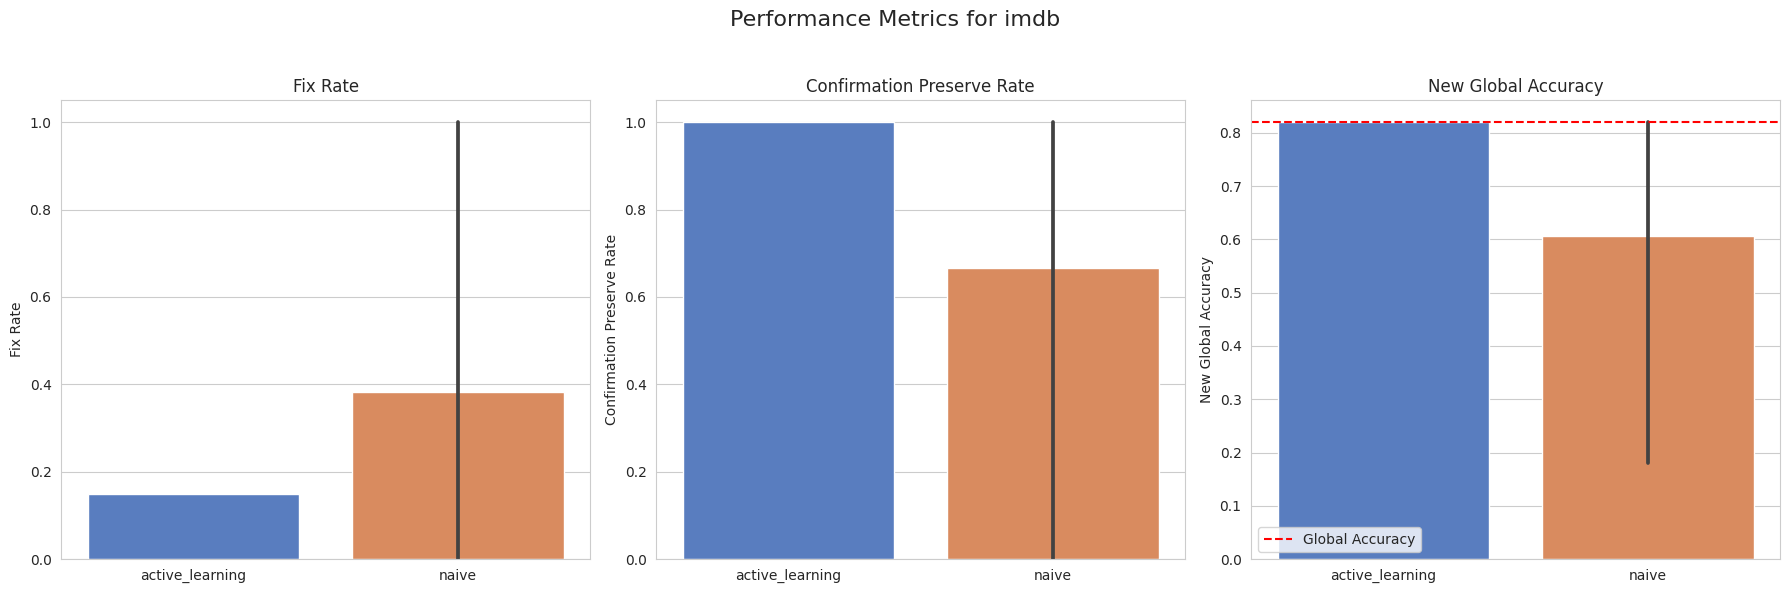

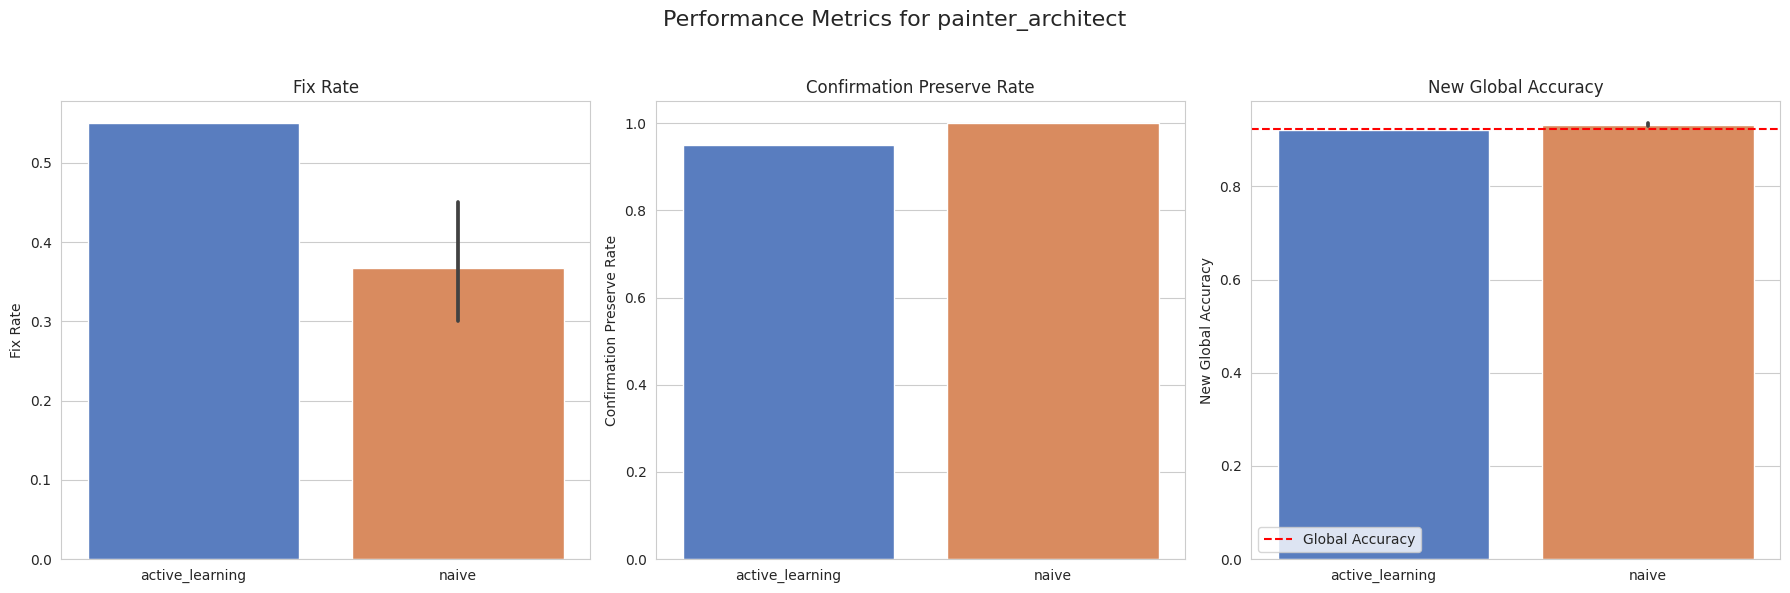

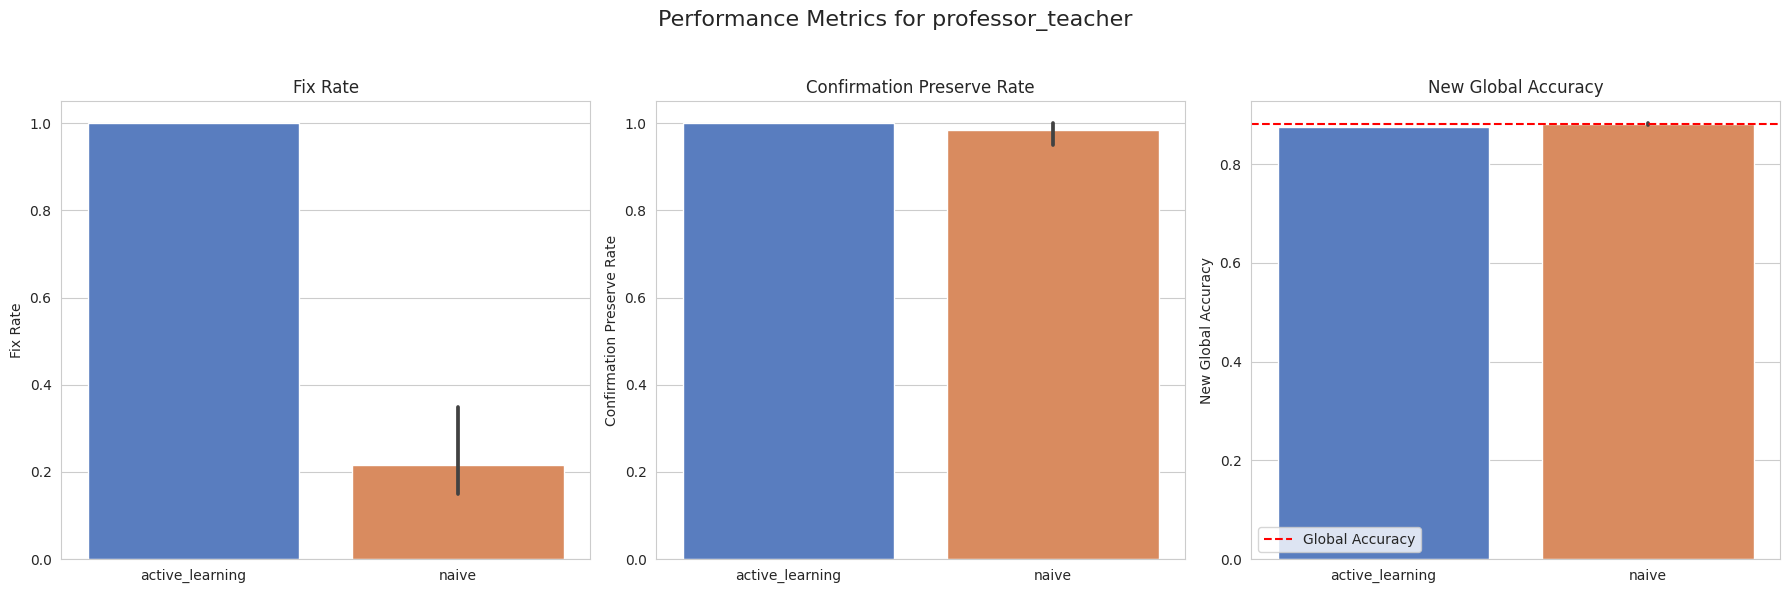

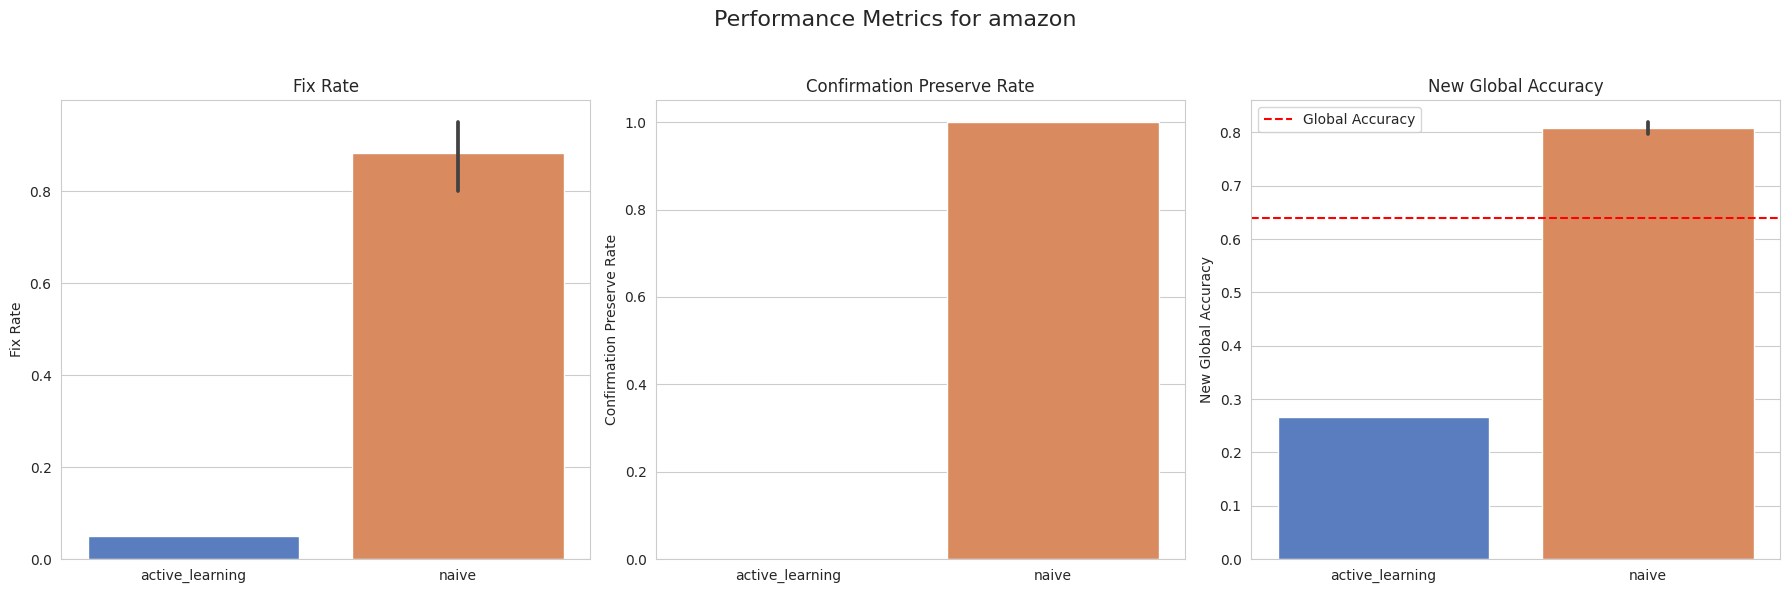

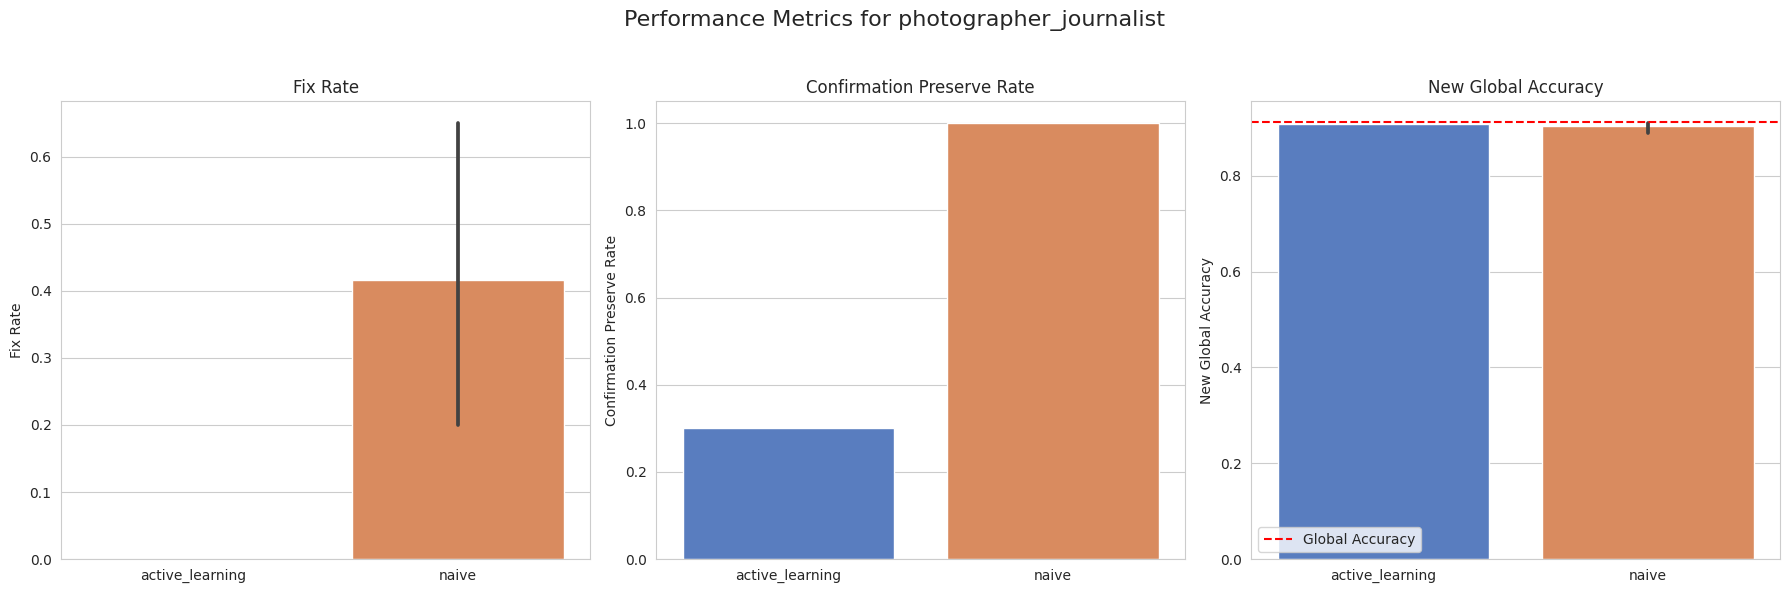

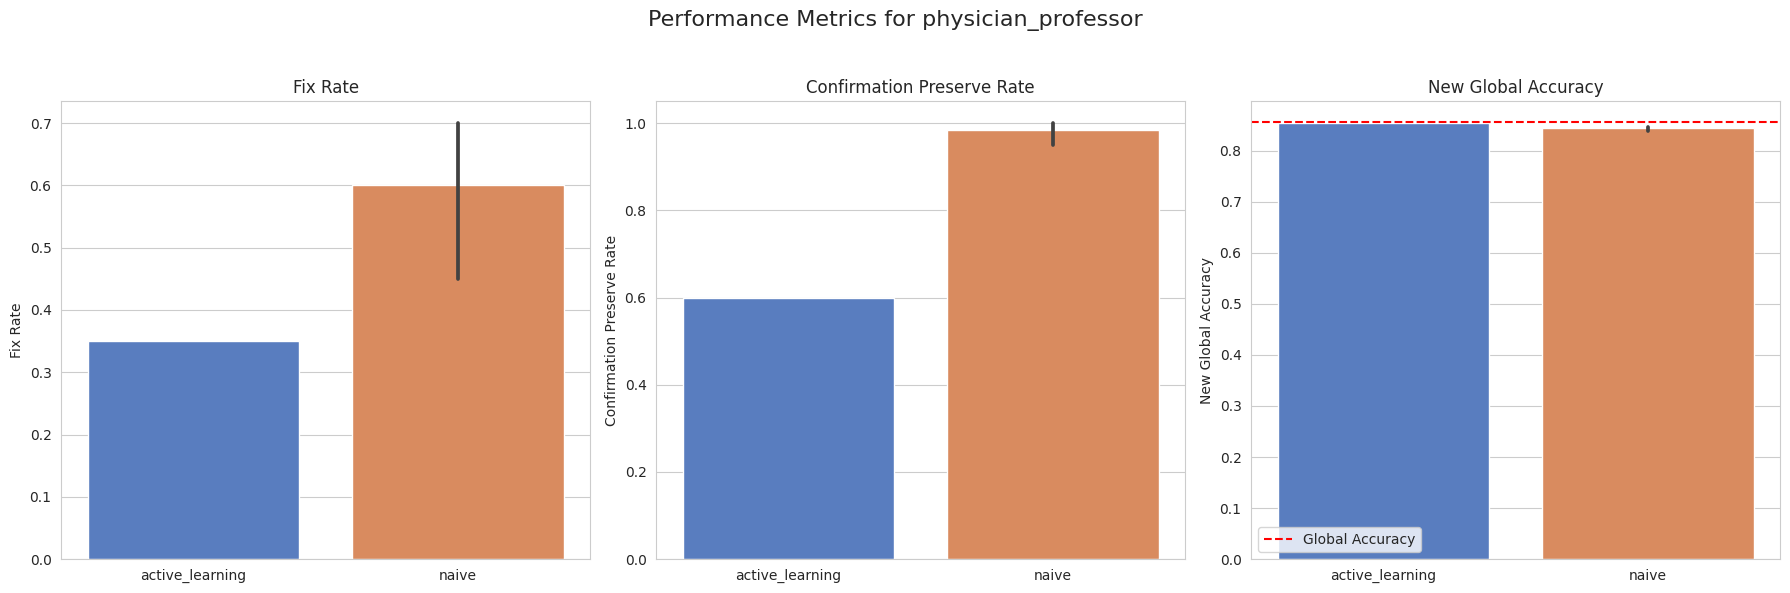

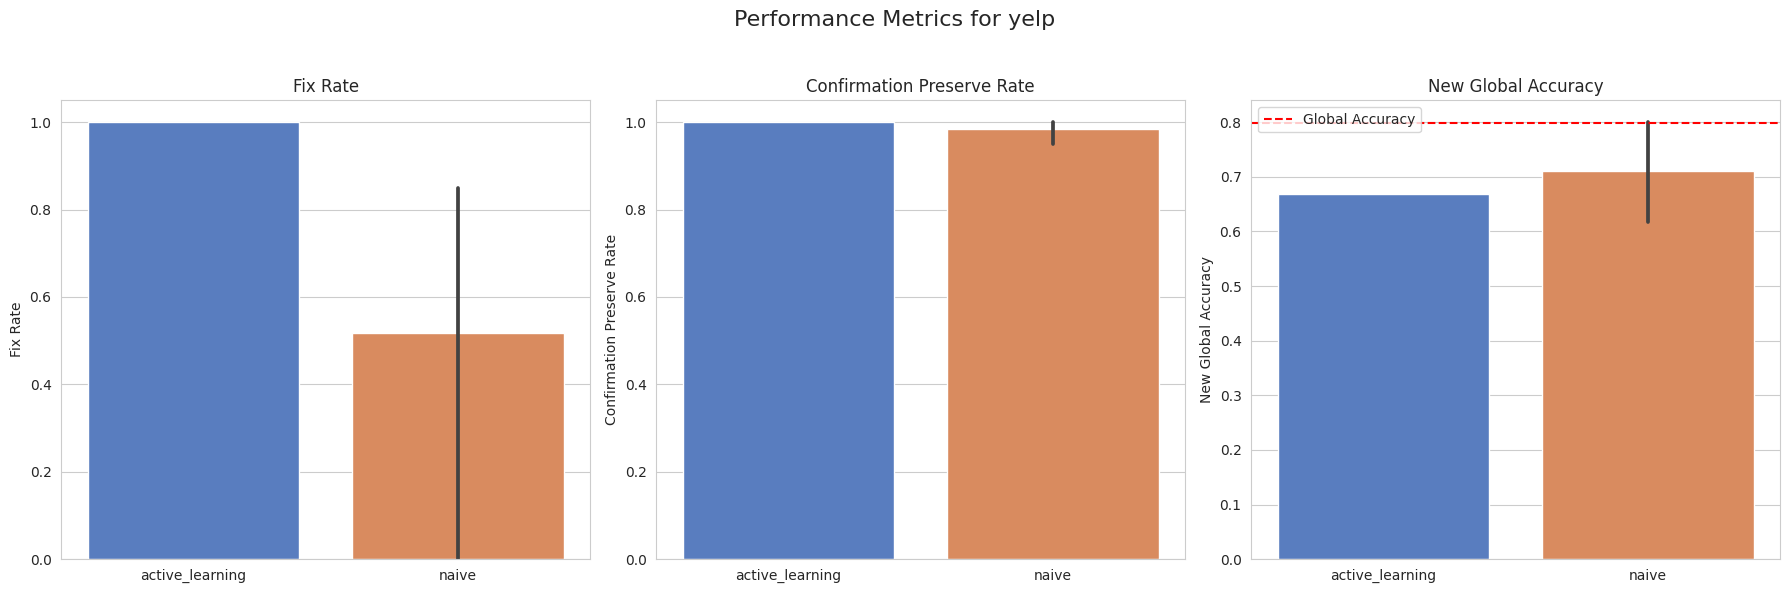

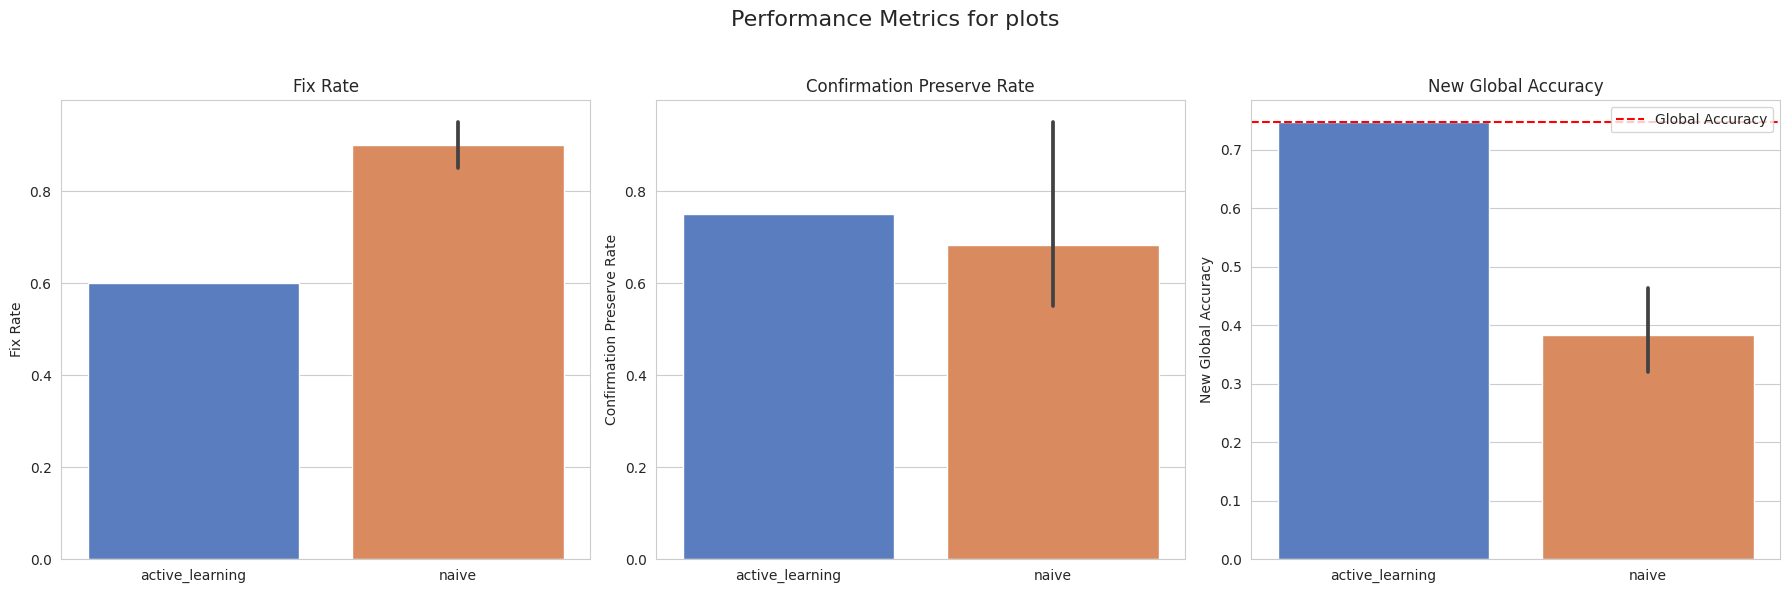

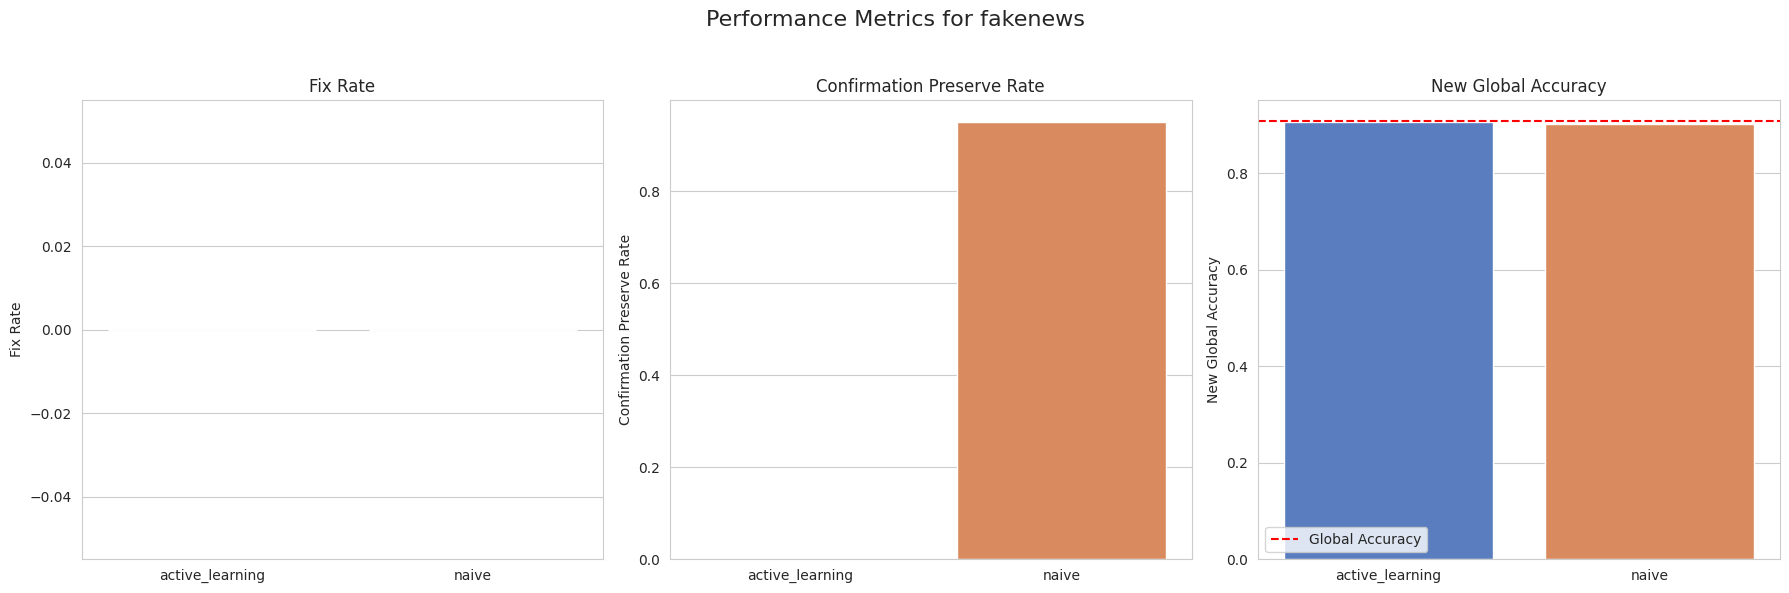

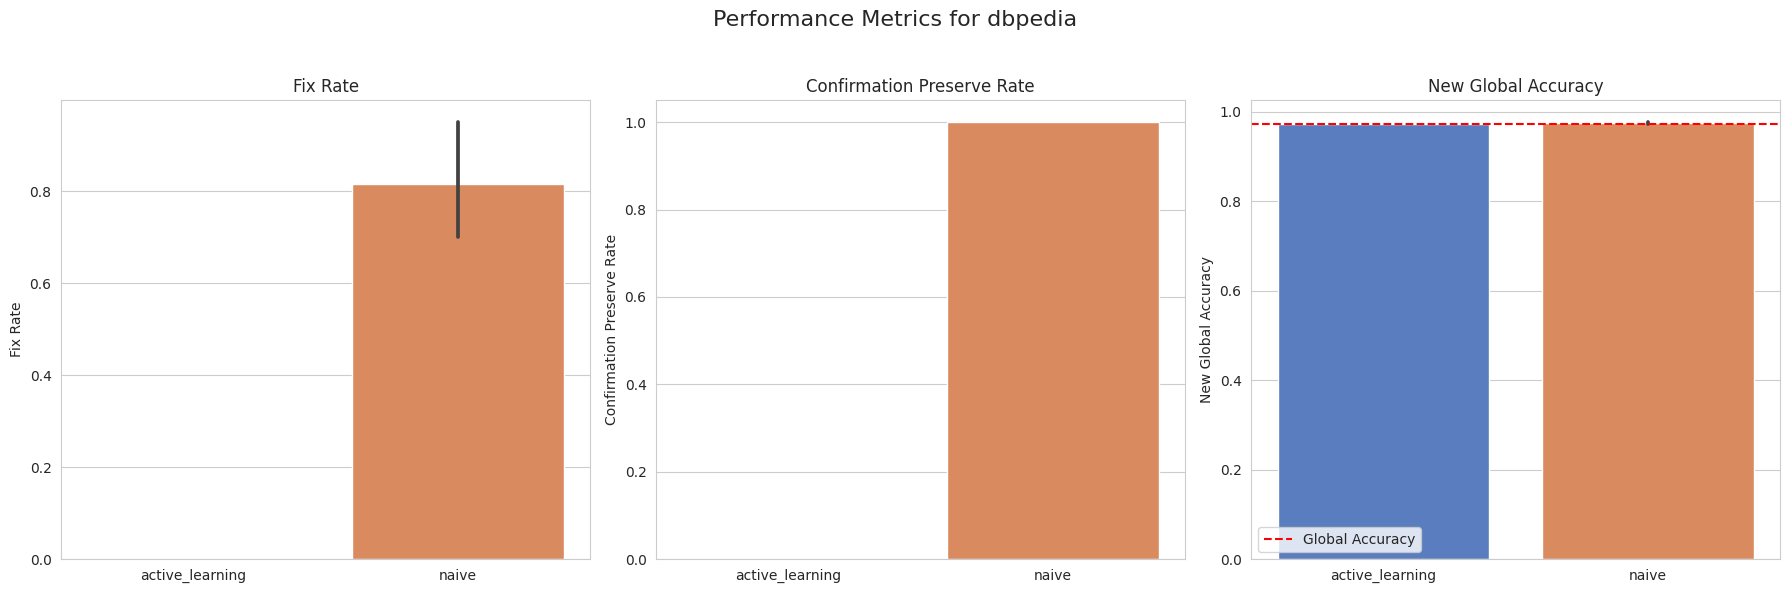

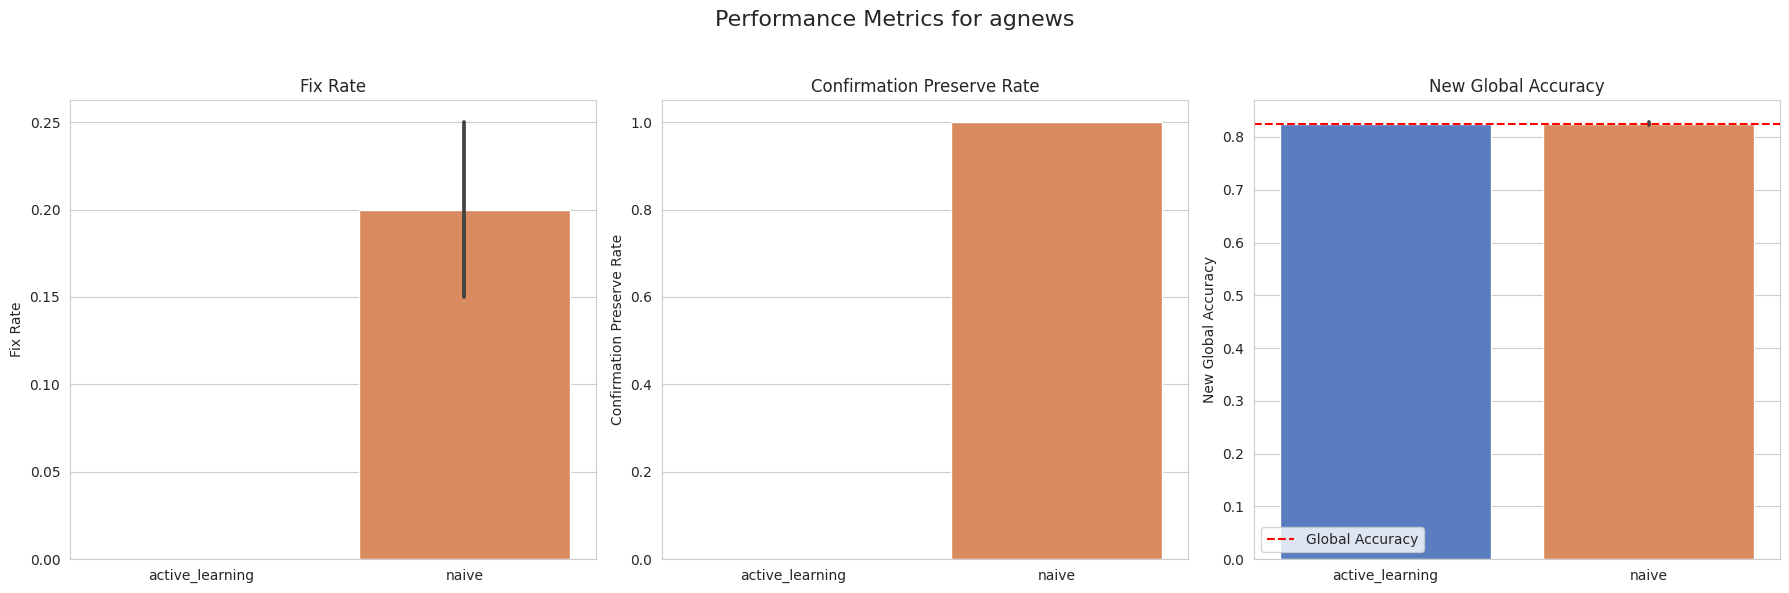

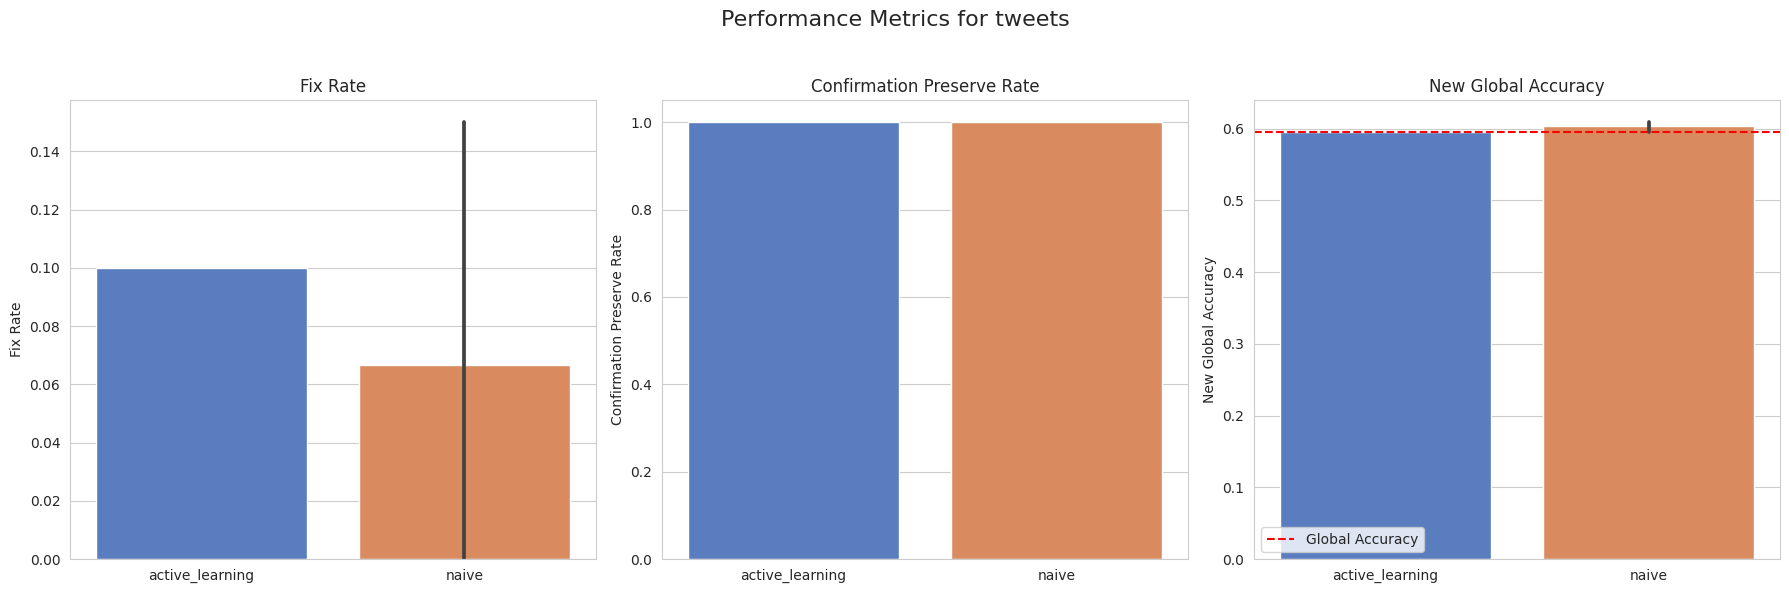

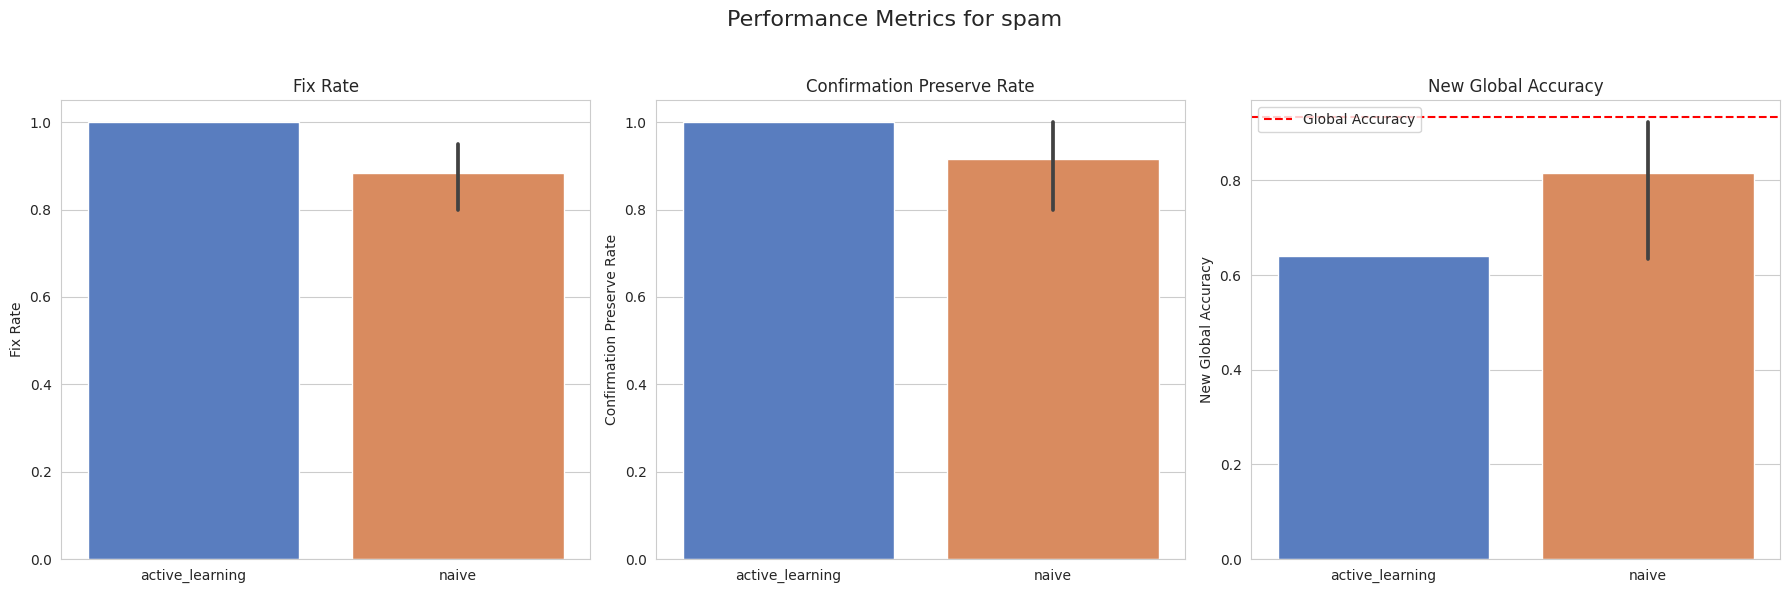

In [97]:
show_bar_plots(df)

In [98]:
result_dict_percentage = defaultdict(list)

In [99]:
for f in glob.glob('percentage_al_witan_results/*'):
    d_name = f.split('/')[-1]
    print(d_name)
    for ff in glob.glob(f'percentage_al_witan_results/{d_name}/*'):
        print(ff)
        try:
            df_cur = show_stats(ff+'/')
            result_dict_percentage[d_name].append(df_cur)
        except:
            print(f"ff was not finished ")
            continue


imdb
percentage_al_witan_results/imdb/_20240516114940
percentage_al_witan_results/imdb/_20240516114940/20240516114940_experiment_stats
  user_input_strat             strat  seed  pickle_file_name table_name   
0  active_learning  information_gain  1903  placeholder_name       imdb  \

    timestamp_str deletion_type  deletion_absolute_threshold  rbbm_runtime   
0  20240516114940         ratio                           10       468.897  \

   bbox_runtime  ...  deletion_factor  post_fix_num_funcs   
0        58.157  ...              0.0                   7  \

   num_of_funcs_processed_by_algo  complaint_reached_max  confirm_reached_max   
0                               7                  False                False  \

   lf_source  retrain_after_percent  retrain_accuracy_thresh   
0  undefined                      1                        1  \

   load_funcs_from_pickle  pre_deletion_threshold  
0                   False                     0.0  

[1 rows x 32 columns]
percentage_al_w

In [100]:
res_df_percentage=[]

In [101]:
for k, v in result_dict_percentage.items():
    res_df_percentage.append(pd.concat(v))

In [102]:
for k, v in result_dict_percentage.items():
    print(f"{k}: {len(v)}")

imdb: 3
painter_architect: 3
professor_teacher: 3
amazon: 3
photographer_journalist: 2
physician: 2
yelp: 2
plots: 2
dbpedia: 2
agnews: 2
tweets: 2
spam: 2


In [103]:
df_percentage = pd.concat(res_df_percentage)

In [106]:
df_percentage.columns

Index(['user_input_strat', 'strat', 'seed', 'pickle_file_name', 'table_name',
       'timestamp_str', 'deletion_type', 'deletion_absolute_threshold',
       'rbbm_runtime', 'bbox_runtime', 'avg_tree_size_increase',
       'user_input_size', 'complaint_ratio', 'num_complaints',
       'num_confirmations', 'global_accuracy', 'fix_rate',
       'confirm_preserve_rate', 'new_global_accuracy', 'prev_signaled_cnt',
       'new_signaled_cnt', 'num_functions', 'deletion_factor',
       'post_fix_num_funcs', 'num_of_funcs_processed_by_algo',
       'complaint_reached_max', 'confirm_reached_max', 'lf_source',
       'retrain_after_percent', 'retrain_accuracy_thresh',
       'load_funcs_from_pickle', 'pre_deletion_threshold'],
      dtype='object')

In [107]:
df_percentage[df_percentage['table_name']=='painter_architect'][['num_complaints', 'num_confirmations']]

,num_complaints,num_confirmations
0,8,100
0,8,100
0,8,100


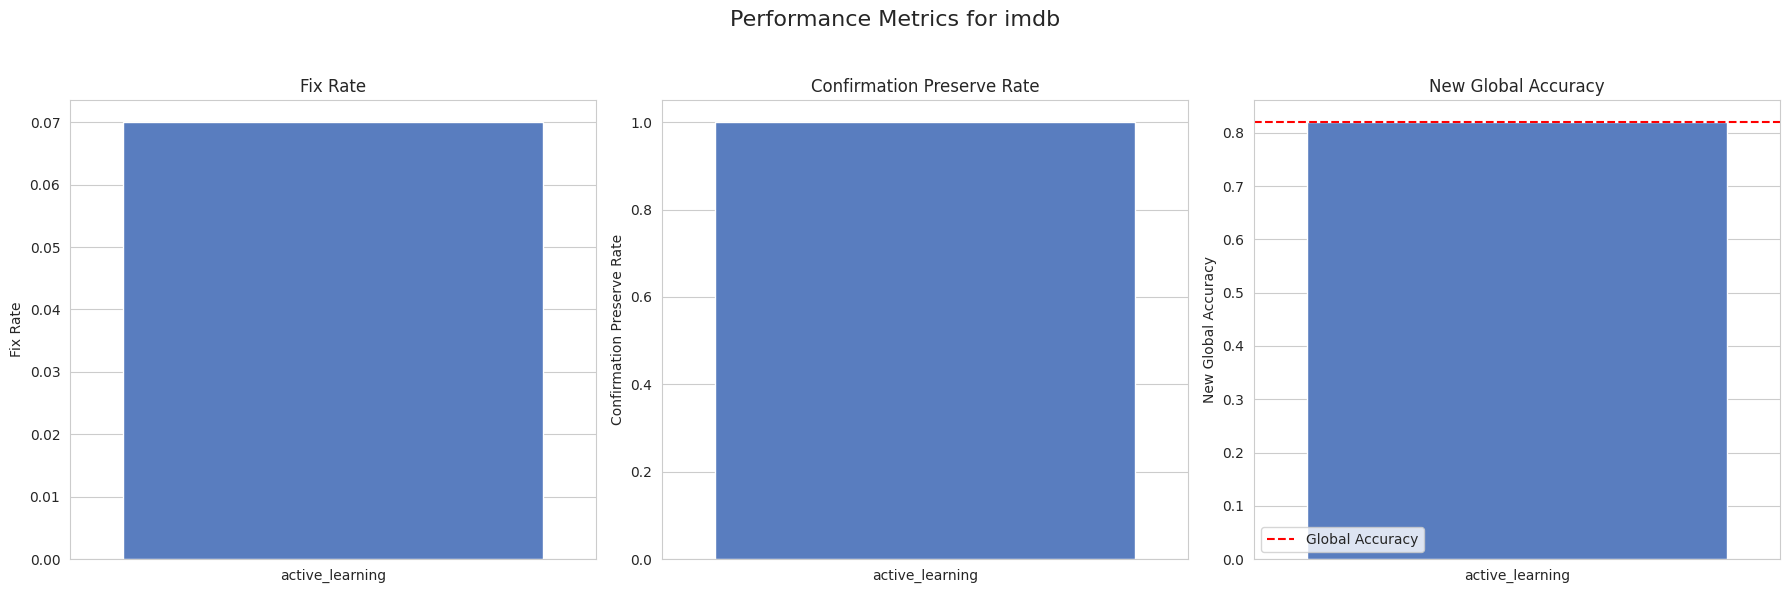

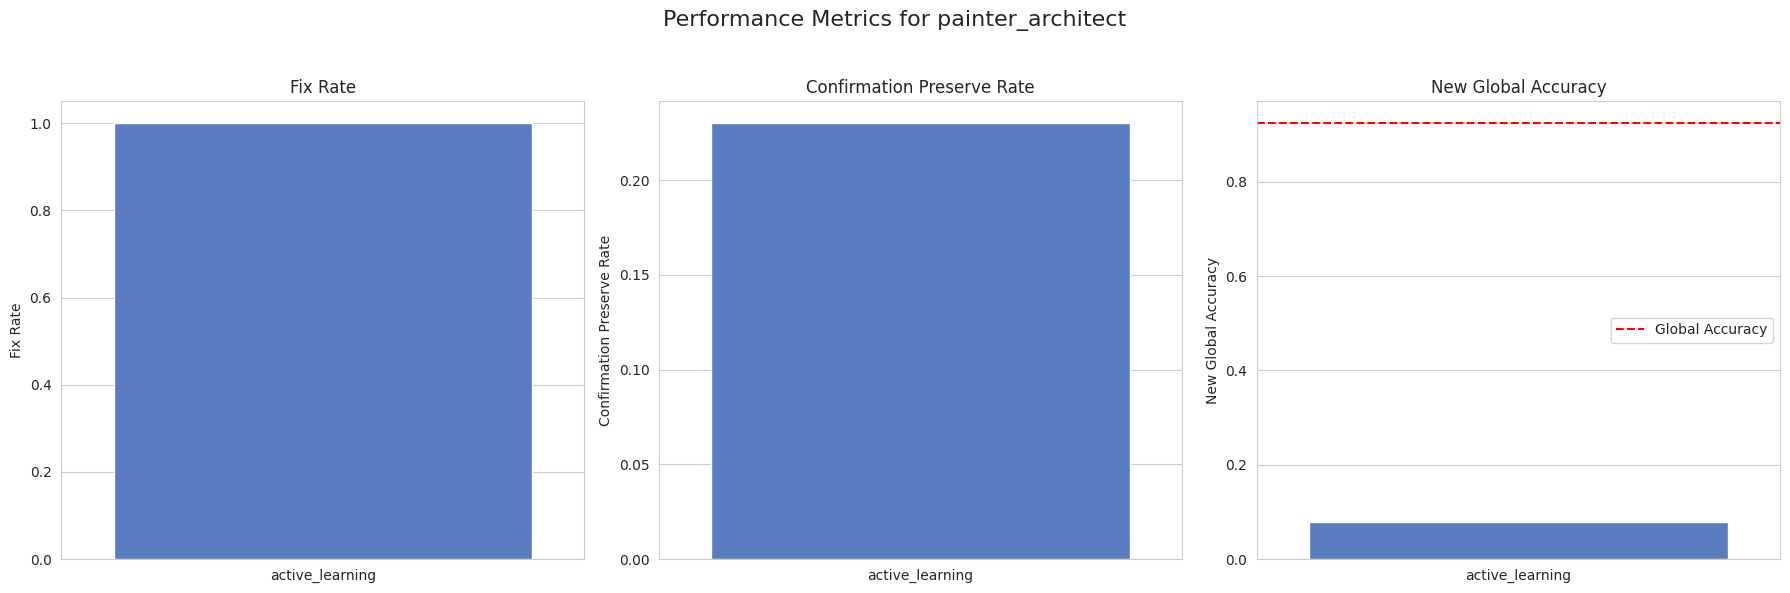

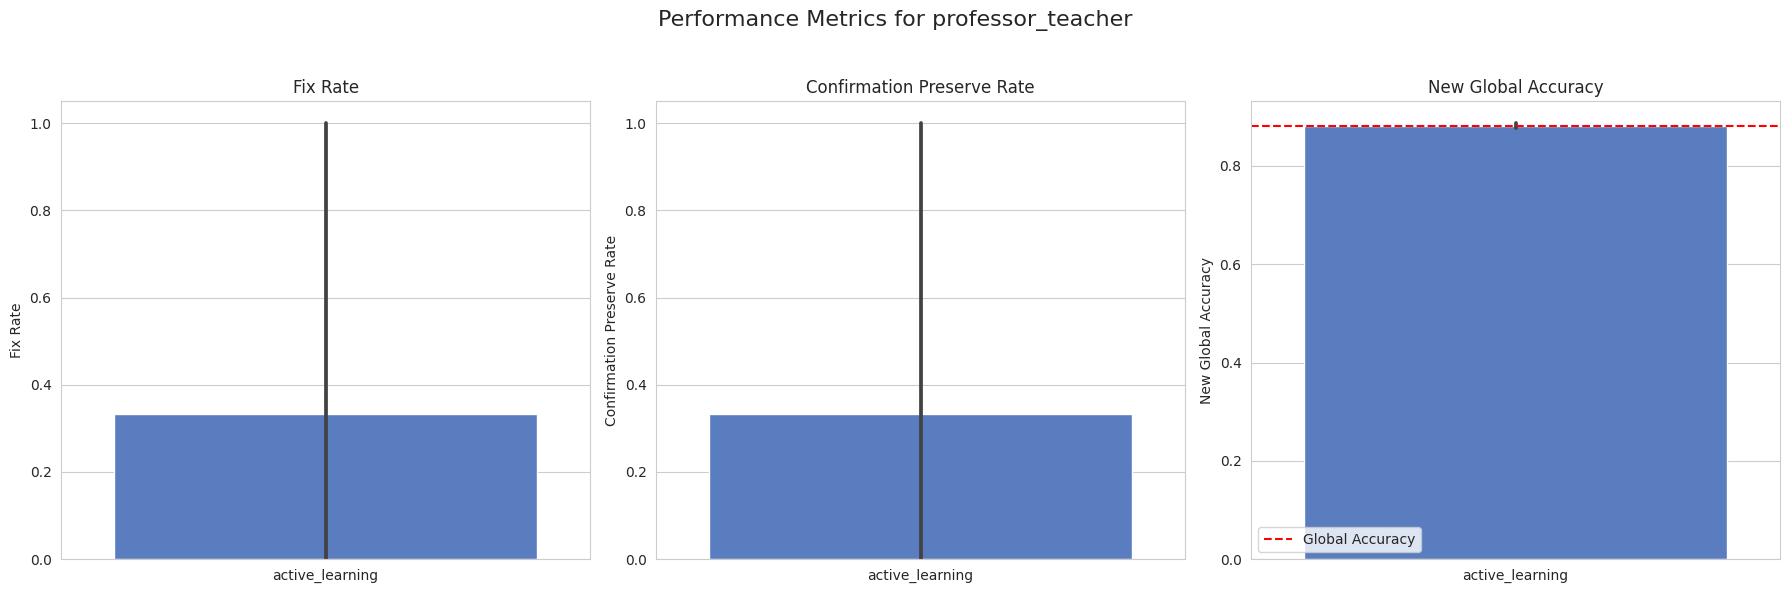

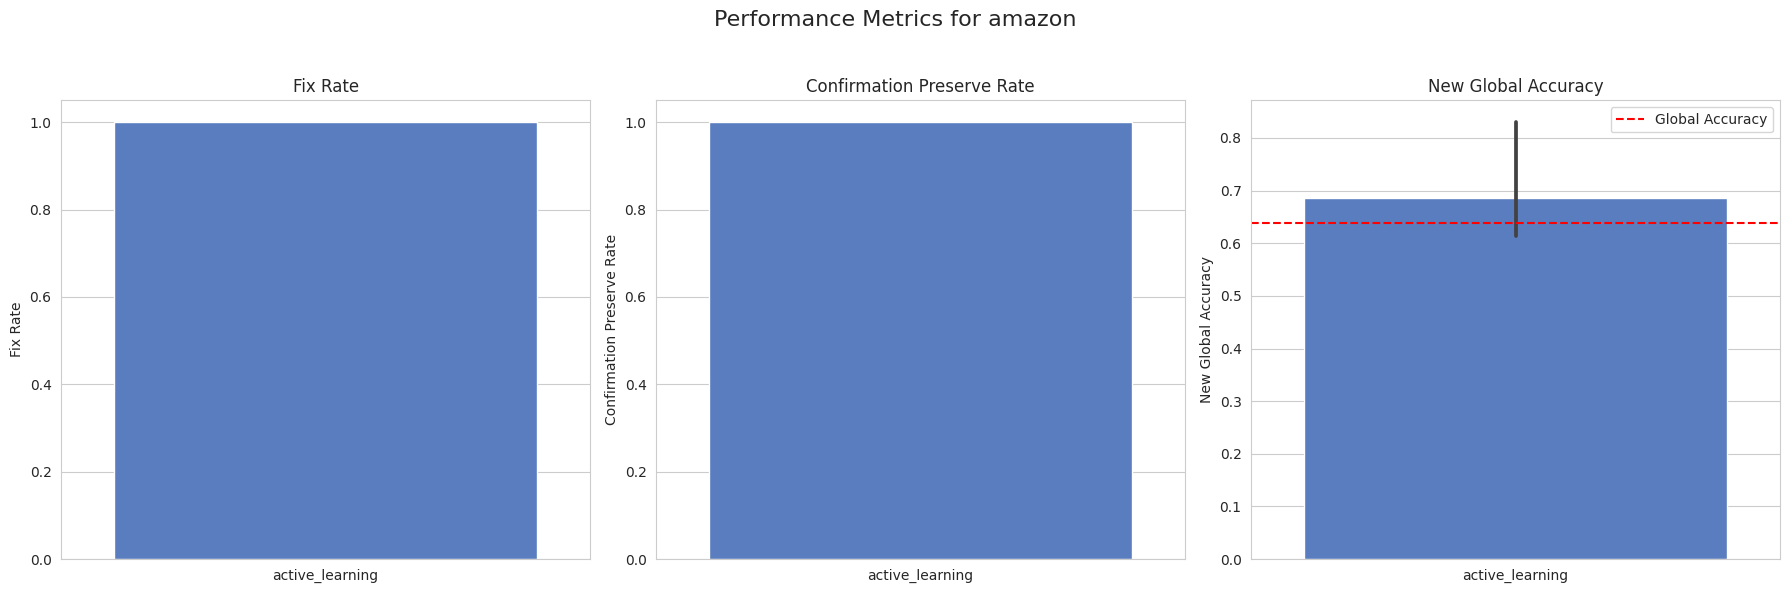

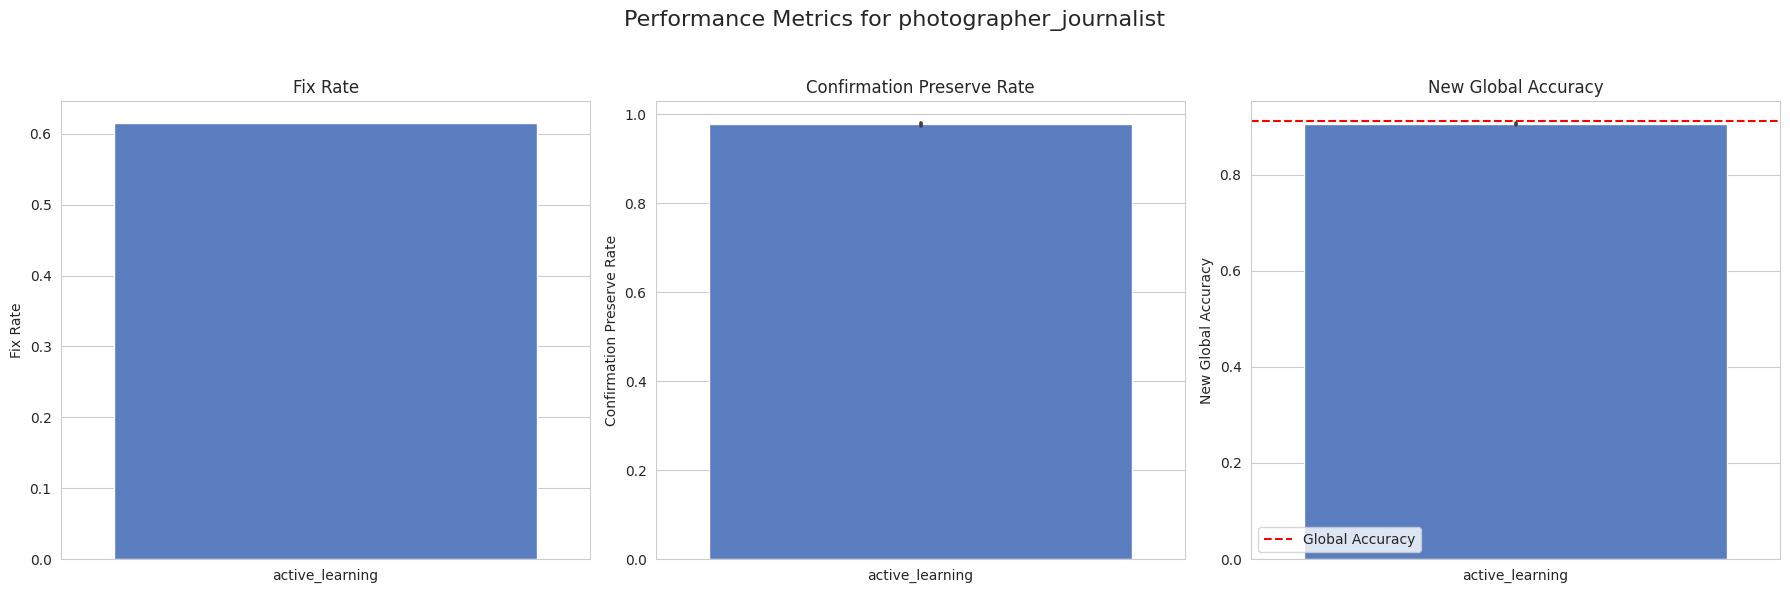

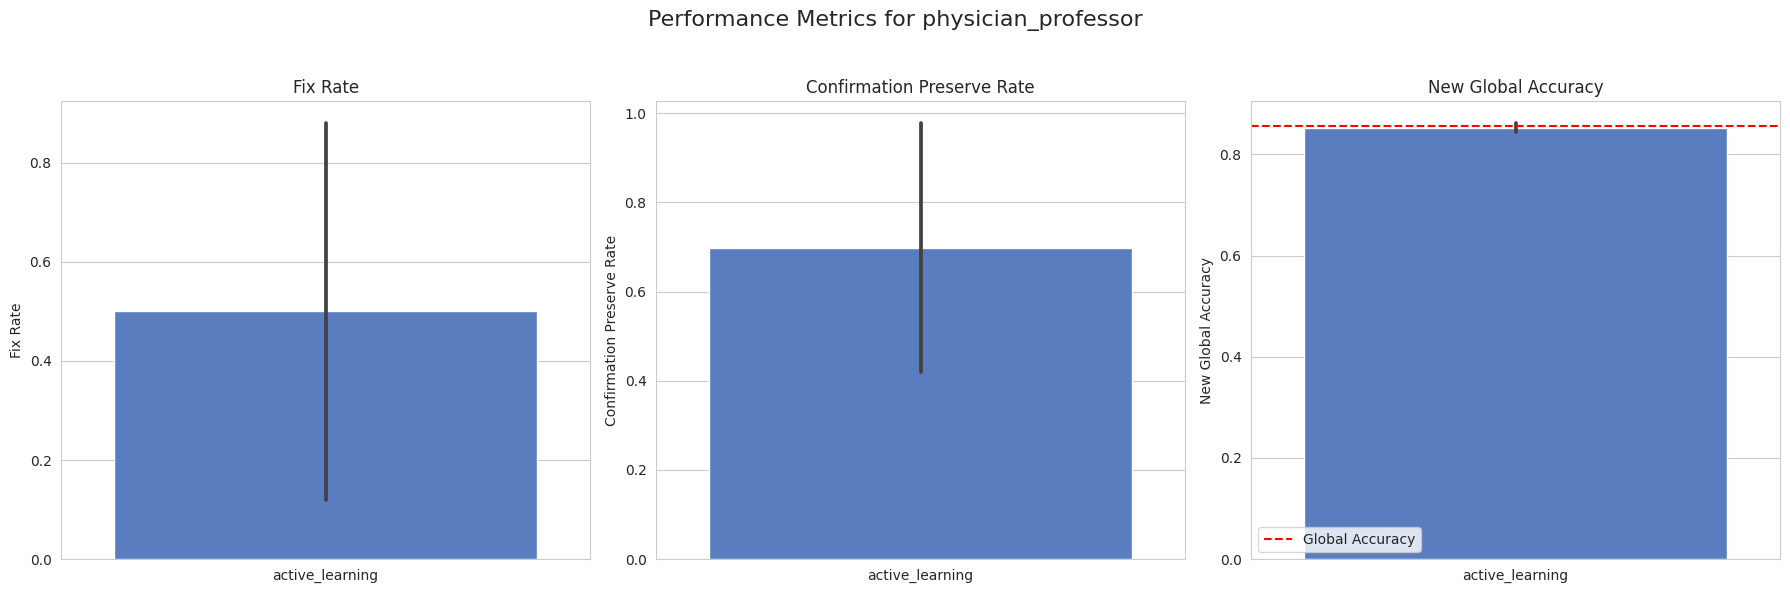

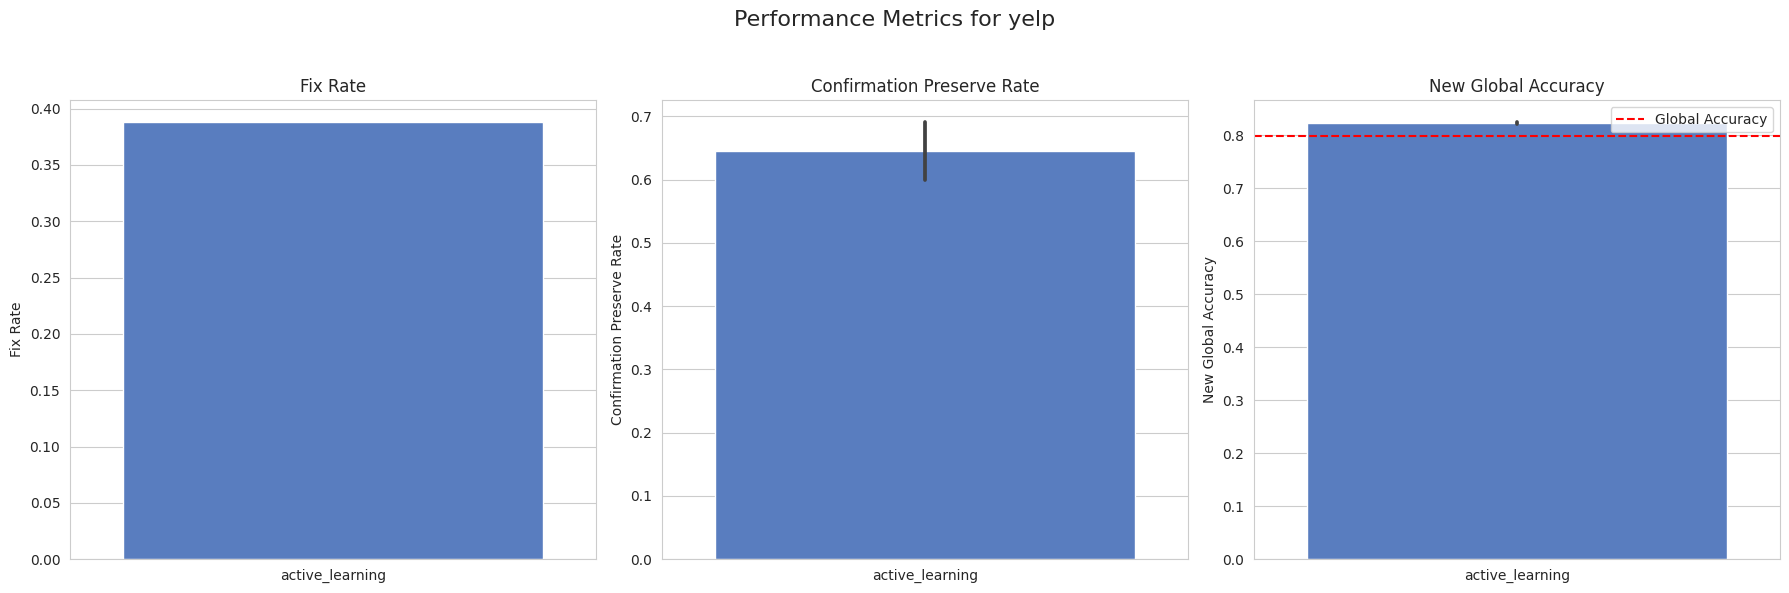

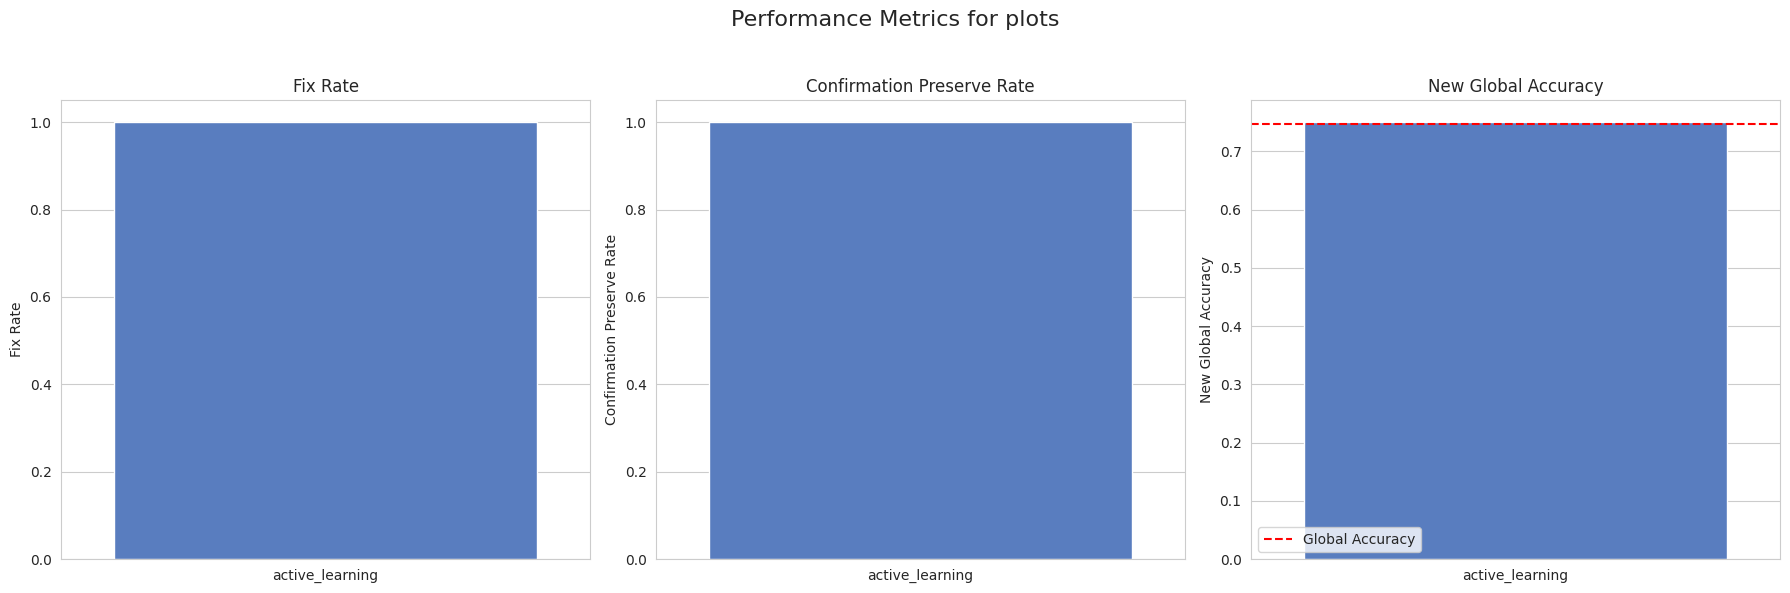

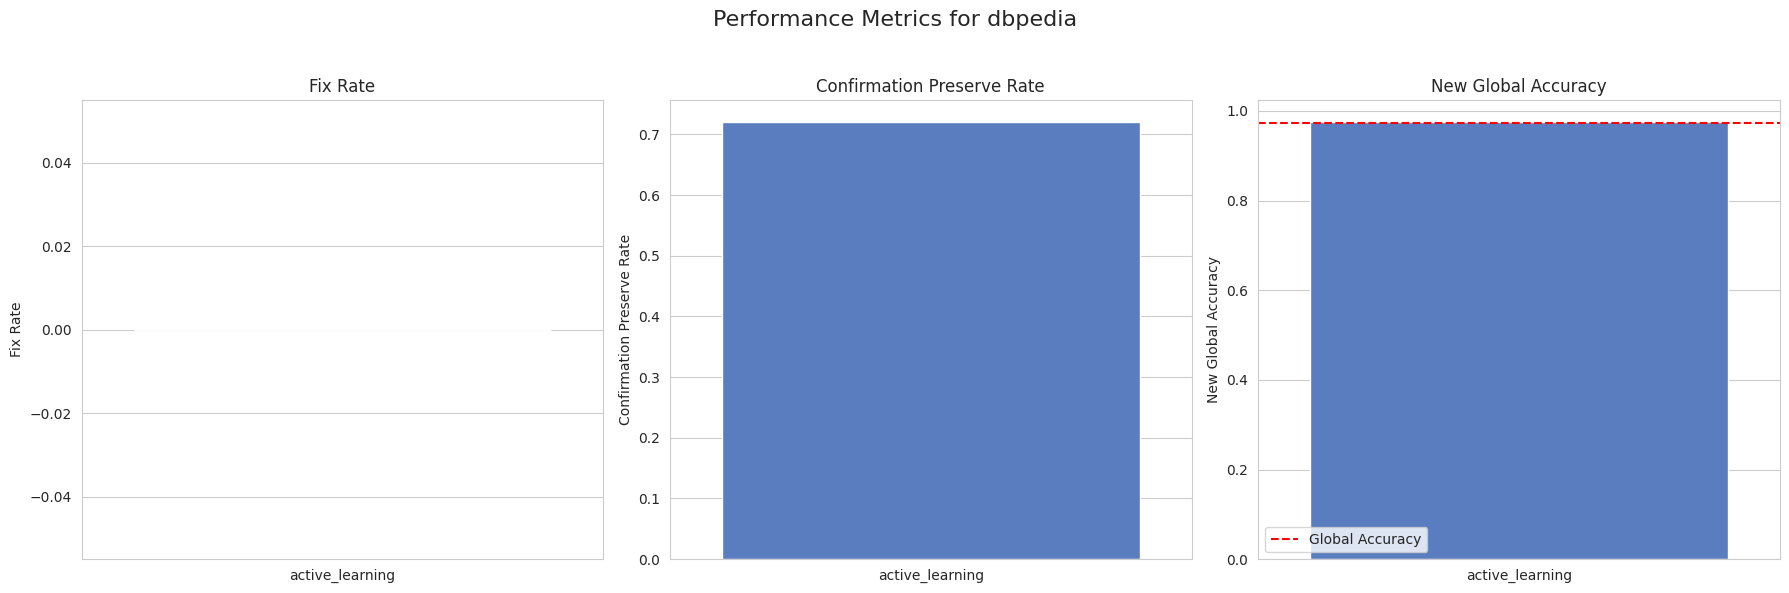

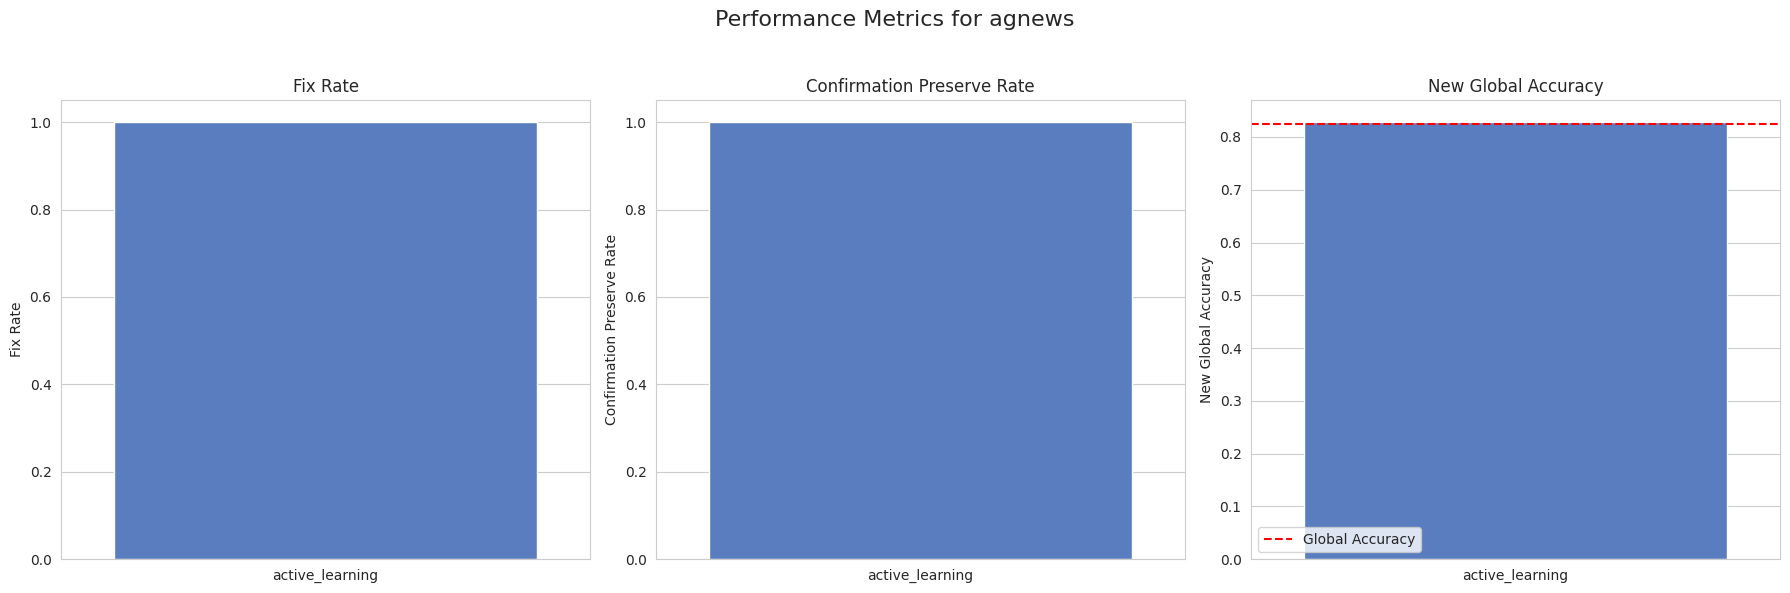

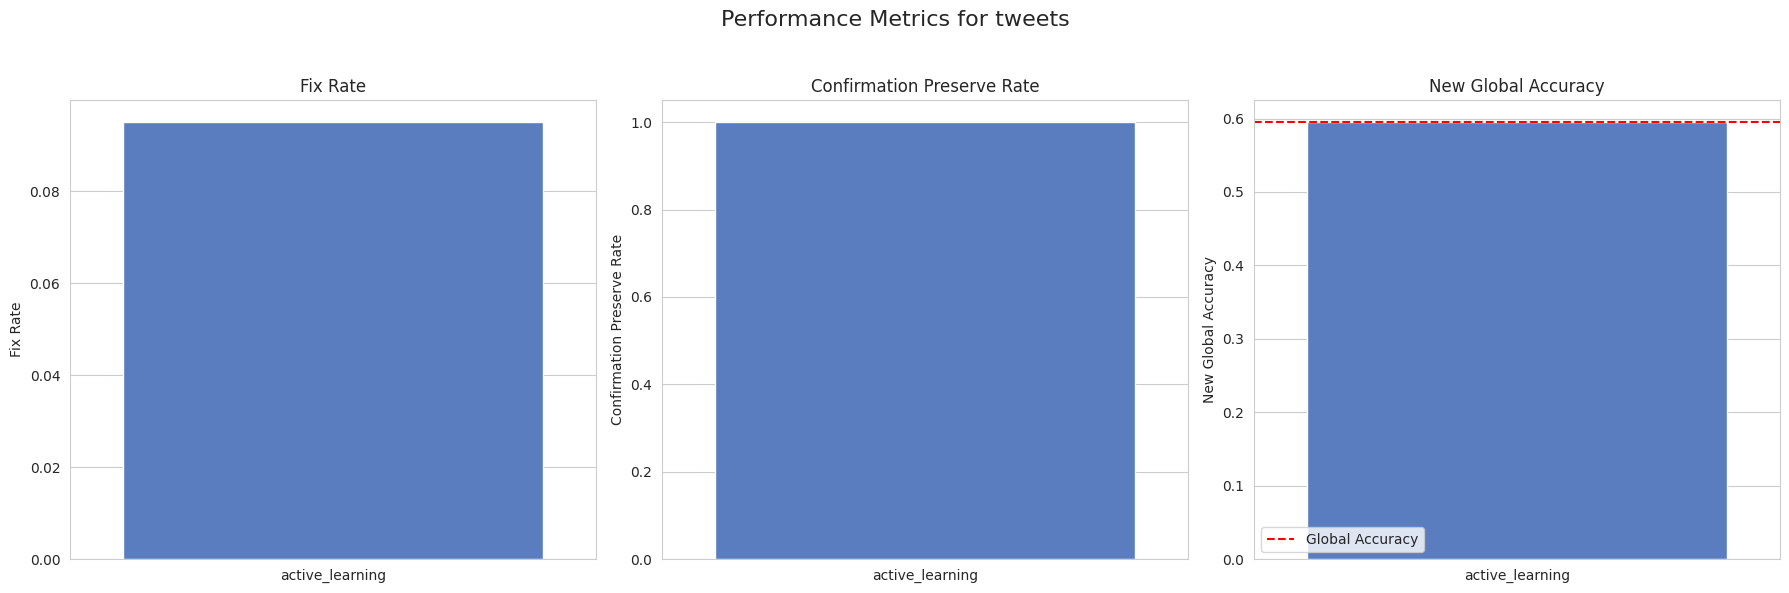

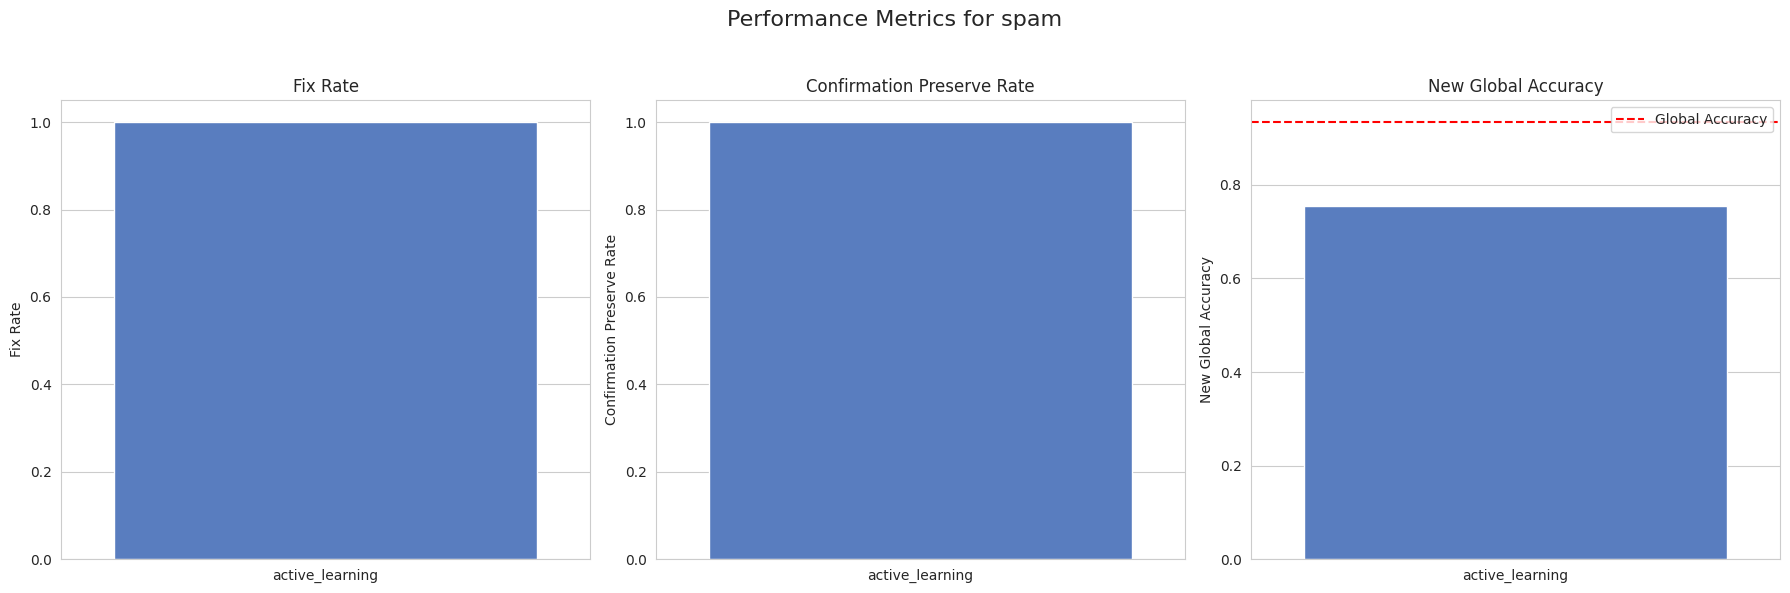

In [104]:
show_bar_plots(df_percentage)